In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import shap
from google.colab import files
uploaded = files.upload()

# Cargar el dataset
df1 = pd.read_csv('data_clean_emotions_realistic.csv')

df2=pd.read_csv('data_emotions_realistic_medium.csv')

Saving data_emotions_realistic_medium.csv to data_emotions_realistic_medium (1).csv
Saving data_clean_emotions_realistic.csv to data_clean_emotions_realistic (1).csv


In [4]:
df1  = pd.read_csv('data_clean_emotions_realistic.csv')
print(df1.head(5))

df2=pd.read_csv('data_emotions_realistic_medium.csv')
print(df2.head(5))

                                user_id            timestamp  \
0  eebedd06-dcc4-4002-9aa7-f532121a5400  2025-06-09 14:00:54   
1  fae8d31d-08f3-4e15-bef9-384773ad739f  2026-01-15 12:23:43   
2  3b6aa695-a84a-4e5f-818a-dcee3ca29f80  2024-01-21 00:28:07   
3  29133a34-6301-4126-b82b-bd1f3165ef4a  2025-08-03 06:57:40   
4  714af052-4fa8-4eed-b59d-73a6e0f94108  2025-10-10 06:37:02   

                      text  emotion       age      year     month       day  \
0          It seems happy!    feliz  0.635027  0.867821 -0.128768 -0.780848   
1            It went well!    feliz  1.465882  2.734102 -1.567521 -0.096060   
2  It is what it is. Okay.  neutral -0.680493 -0.998460 -1.567521  0.588727   
3   Seems quite hurt. Bad.   triste -1.234397  0.867821  0.446733 -1.465635   
4  It looks excited. Nice.    feliz  0.427313  0.867821  1.022234 -0.666716   

   day_of_week      hour  ...  tfidf_60  tfidf_61  tfidf_62  tfidf_63  \
0    -1.431832  0.363328  ...       0.0       0.0       0.0  0.0000

In [5]:
X_text1 = df1['text']
y1 = df1['emotion']

X_text2 = df2['text']
y2 = df2['emotion']

In [6]:
# Vectorizar texto (máximo 500 palabras más frecuentes para simplicidad)
vectorizer = TfidfVectorizer(max_features=500)

X1_vect = vectorizer.fit_transform(X_text1)
X2_vect = vectorizer.fit_transform(X_text2)

In [7]:
# Dataset 1
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X1_vect, y1)
accuracy1 = model1.score(X1_vect, y1)
print(f"Accuracy dataset 1: {accuracy1:.2f}")

# Dataset 2
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X2_vect, y2)
accuracy2 = model2.score(X2_vect, y2)
print(f"Accuracy dataset 2: {accuracy2:.2f}")

Accuracy dataset 1: 0.97
Accuracy dataset 2: 0.97


In [8]:
X1_dense = X1_vect.toarray()
X2_dense = X2_vect.toarray()


In [9]:
# Inicializar SHAP
explainer1 = shap.TreeExplainer(model1, X1_dense)
shap_values1 = explainer1(X1_dense)

explainer2 = shap.TreeExplainer(model2, X2_dense)
shap_values2 = explainer2(X2_dense)

100%|===================| 5989/6000 [02:39<00:00]       

In [11]:
X1_vect = vectorizer.transform(df1['text'])  # Usar transform, NO fit_transform
X1_dense = X1_vect.toarray()
X2_vect = vectorizer.transform(df2['text'])  # Usar transform, NO fit_transform
X2_dense = X2_vect.toarray()


In [12]:
print("X1_dense.shape:", X1_dense.shape)
print("shap_values1.shape:", shap_values1.shape)
print("X2_dense.shape:", X2_dense.shape)
print("shap_values2.shape:", shap_values2.shape)


X1_dense.shape: (1200, 70)
shap_values1.shape: (1200, 70, 5)
X2_dense.shape: (1200, 70)
shap_values2.shape: (1200, 70, 5)


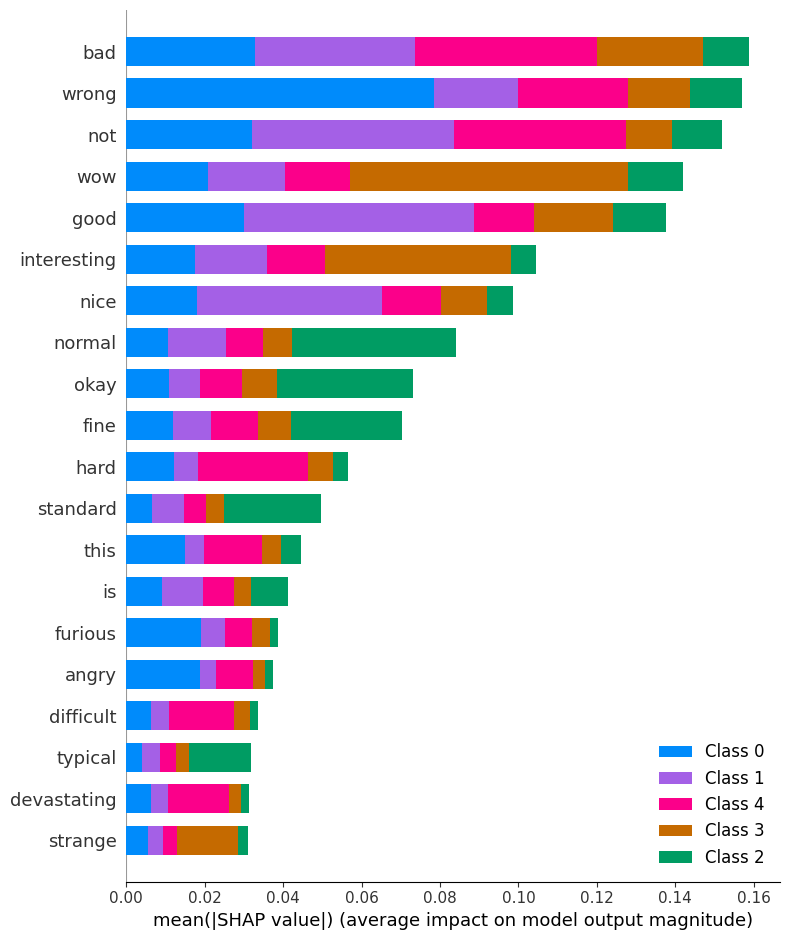

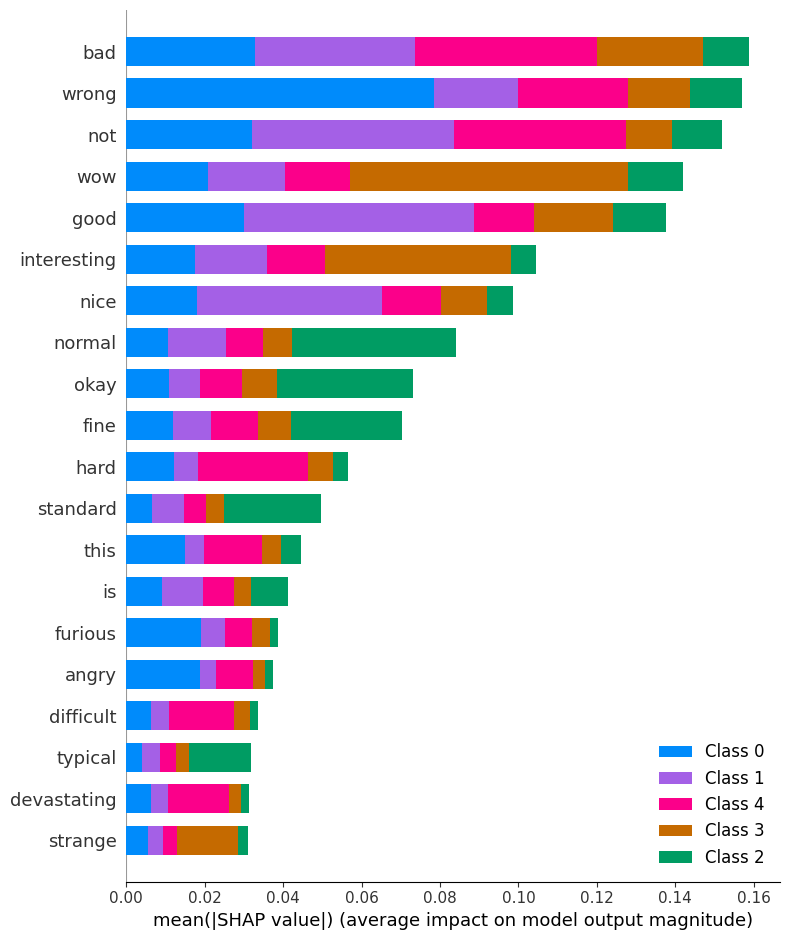

In [13]:
# Summary plot para dataset 1
shap.summary_plot(shap_values1, X1_dense, feature_names=vectorizer.get_feature_names_out())

# Summary plot para dataset 2
shap.summary_plot(shap_values2, X2_dense, feature_names=vectorizer.get_feature_names_out())


Cross_validation en el dataset clean n_splits=5

In [14]:
#Preparar el vectorizador y el modelo
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier  # o tu modelo

vectorizer = TfidfVectorizer(max_features=5000)  # o tu configuración
model = RandomForestClassifier(n_estimators=100, random_state=42)


In [15]:
#Vectorizar los datos
X1_vect = vectorizer.fit_transform(df1['text'])
y1 = df1['emotion']


In [16]:
#Definir el cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X1_vect, y1, cv=kf, scoring='accuracy')
print("Accuracy por fold:", scores)
print("Accuracy media:", scores.mean())


Accuracy por fold: [0.925      0.8625     0.84583333 0.88333333 0.9       ]
Accuracy media: 0.8833333333333334


In [17]:
#Entrenar un modelo final para SHAP
X1_vect_final = vectorizer.fit_transform(df1['text'])
X1_dense_final = X1_vect_final.toarray()

model.fit(X1_dense_final, y1)


RandomForestClassifier(random_state=42)

In [18]:
#Revisa las métricas por fold
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X1_vect = vectorizer.fit_transform(df1['text'])
y1 = df1['emotion']

model = RandomForestClassifier(n_estimators=100, random_state=42)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X1_vect, y1, cv=kf, scoring='accuracy')
print("Accuracy por fold:", scores)
print("Accuracy media:", scores.mean())


Accuracy por fold: [0.925      0.8625     0.84583333 0.88333333 0.9       ]
Accuracy media: 0.8833333333333334


In [19]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
# Predicciones usando cross-validation
y1_pred = cross_val_predict(model, X1_vect, y1, cv=kf)

from sklearn.metrics import classification_report

# y_pred ya viene de cross_val_predict
report = classification_report(
    y1,
    y1_pred,
    target_names=["feliz", "triste", "enojado", "sorprendido", "neutral"],
    output_dict=True   # <--- Esto lo devuelve como dict
)

# Ahora report es un diccionario
print(report)  # para ver todo

{'feliz': {'precision': 0.903010033444816, 'recall': 0.903010033444816, 'f1-score': 0.903010033444816, 'support': 299.0}, 'triste': {'precision': 0.8790322580645161, 'recall': 0.897119341563786, 'f1-score': 0.8879837067209776, 'support': 243.0}, 'enojado': {'precision': 0.813953488372093, 'recall': 0.7954545454545454, 'f1-score': 0.8045977011494253, 'support': 176.0}, 'sorprendido': {'precision': 0.9230769230769231, 'recall': 0.9230769230769231, 'f1-score': 0.9230769230769231, 'support': 260.0}, 'neutral': {'precision': 0.8687782805429864, 'recall': 0.8648648648648649, 'f1-score': 0.8668171557562077, 'support': 222.0}, 'accuracy': 0.8833333333333333, 'macro avg': {'precision': 0.8775701967002668, 'recall': 0.876705141680987, 'f1-score': 0.87709710402967, 'support': 1200.0}, 'weighted avg': {'precision': 0.8831078591197574, 'recall': 0.8833333333333333, 'f1-score': 0.8831855372611455, 'support': 1200.0}}


In [21]:
import pandas as pd

# Convertir el dict a DataFrame
df_metrics = pd.DataFrame(report).transpose()  # transpose para que las filas sean las clases

# Mostrar la tabla
print(df_metrics)




              precision    recall  f1-score      support
feliz          0.903010  0.903010  0.903010   299.000000
triste         0.879032  0.897119  0.887984   243.000000
enojado        0.813953  0.795455  0.804598   176.000000
sorprendido    0.923077  0.923077  0.923077   260.000000
neutral        0.868778  0.864865  0.866817   222.000000
accuracy       0.883333  0.883333  0.883333     0.883333
macro avg      0.877570  0.876705  0.877097  1200.000000
weighted avg   0.883108  0.883333  0.883186  1200.000000


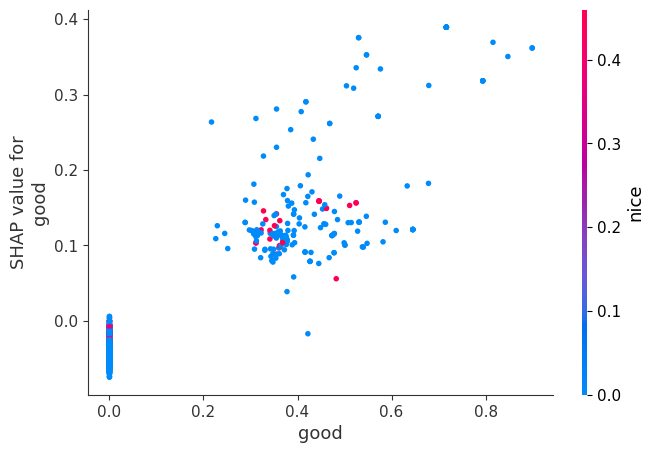

In [24]:
#Datos vectorizados con nombres de las columnas
X1_df = pd.DataFrame(X1_dense, columns=vectorizer.get_feature_names_out())

#Elegir la clase que queremos analizar
clase_objetivo = "feliz"
class_index = list(model1.classes_).index(clase_objetivo)

#Dependence plot para la palabra "good" en la clase "feliz"
shap.dependence_plot(
    "good",
    shap_values1.values[:, :, class_index],  # solo valores de la clase "feliz"
    X1_df,
    display_features=X1_df  # para mostrar nombres de palabras
)
